# Aim: Preliminary Data Analysis

In [53]:
# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
# import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os
import math
import csv
import json

In [3]:
os.getcwd()

'C:\\D Drive\\University of Washington\\Study\\Quarter 2\\DATA 557\\Project'

In [4]:
data = pd.read_csv('data/Telco_customer_churn.csv')

In [5]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
print(f'{len(data['CustomerID'].unique())} vs {len(data['CustomerID'])}')

7043 vs 7043


In [7]:
data['CustomerID'].unique().shape

(7043,)

In [8]:
data['CustomerID'].shape

(7043,)

In [9]:
len(data['City'].unique())

1129

In [10]:
data.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [11]:
unique_values = {column: len(data[column].unique()) for column in data.columns}

In [12]:
unique_values

{'CustomerID': 7043,
 'Count': 1,
 'Country': 1,
 'State': 1,
 'City': 1129,
 'Zip Code': 1652,
 'Lat Long': 1652,
 'Latitude': 1652,
 'Longitude': 1651,
 'Gender': 2,
 'Senior Citizen': 2,
 'Partner': 2,
 'Dependents': 2,
 'Tenure Months': 73,
 'Phone Service': 2,
 'Multiple Lines': 3,
 'Internet Service': 3,
 'Online Security': 3,
 'Online Backup': 3,
 'Device Protection': 3,
 'Tech Support': 3,
 'Streaming TV': 3,
 'Streaming Movies': 3,
 'Contract': 3,
 'Paperless Billing': 2,
 'Payment Method': 4,
 'Monthly Charges': 1585,
 'Total Charges': 6531,
 'Churn Label': 2,
 'Churn Value': 2,
 'Churn Score': 85,
 'CLTV': 3438,
 'Churn Reason': 21}

In [13]:
managed_unique_values = {}
for key, value in unique_values.items():
    if value < 10: managed_unique_values[key] = value


In [14]:
managed_unique_values

{'Count': 1,
 'Country': 1,
 'State': 1,
 'Gender': 2,
 'Senior Citizen': 2,
 'Partner': 2,
 'Dependents': 2,
 'Phone Service': 2,
 'Multiple Lines': 3,
 'Internet Service': 3,
 'Online Security': 3,
 'Online Backup': 3,
 'Device Protection': 3,
 'Tech Support': 3,
 'Streaming TV': 3,
 'Streaming Movies': 3,
 'Contract': 3,
 'Paperless Billing': 2,
 'Payment Method': 4,
 'Churn Label': 2,
 'Churn Value': 2}

In [15]:
managed_columns = list(managed_unique_values.keys())

In [16]:
managed_columns

['Count',
 'Country',
 'State',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Label',
 'Churn Value']

In [17]:
data[['CustomerID']+managed_columns]

,CustomerID,Count,Country,State,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,...,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label,Churn Value
0,3668-QPYBK,1,United States,California,Male,No,No,No,Yes,No,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,1
1,9237-HQITU,1,United States,California,Female,No,No,Yes,Yes,No,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,1
2,9305-CDSKC,1,United States,California,Female,No,No,Yes,Yes,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,1
3,7892-POOKP,1,United States,California,Female,No,Yes,Yes,Yes,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,1
4,0280-XJGEX,1,United States,California,Male,No,No,Yes,Yes,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Female,No,No,No,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),No,0
7039,6840-RESVB,1,United States,California,Male,No,Yes,Yes,Yes,Yes,...,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No,0
7040,2234-XADUH,1,United States,California,Female,No,Yes,Yes,Yes,Yes,...,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No,0
7041,4801-JZAZL,1,United States,California,Female,No,Yes,Yes,No,No phone service,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,0


In [18]:
muv_list = {column: data[column].unique() for column in managed_columns}

In [19]:
muv_list

{'Count': array([1], dtype=int64),
 'Country': array(['United States'], dtype=object),
 'State': array(['California'], dtype=object),
 'Gender': array(['Male', 'Female'], dtype=object),
 'Senior Citizen': array(['No', 'Yes'], dtype=object),
 'Partner': array(['No', 'Yes'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'Phone Service': array(['Yes', 'No'], dtype=object),
 'Multiple Lines': array(['No', 'Yes', 'No phone service'], dtype=object),
 'Internet Service': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'Online Security': array(['Yes', 'No', 'No internet service'], dtype=object),
 'Online Backup': array(['Yes', 'No', 'No internet service'], dtype=object),
 'Device Protection': array(['No', 'Yes', 'No internet service'], dtype=object),
 'Tech Support': array(['No', 'Yes', 'No internet service'], dtype=object),
 'Streaming TV': array(['No', 'Yes', 'No internet service'], dtype=object),
 'Streaming Movies': array(['No', 'Yes', 'No internet service'], dtype

In [20]:
def returnUnique(data, column):
    if len(data[column].unique()) < 10: return data[column].unique()
    return (f'Number of Unique Values: {len(data[column].unique())}', data[column].dtype)

In [21]:
unique_values = {column: returnUnique(data, column) for column in data.columns}

In [22]:
unique_values

{'CustomerID': ('Number of Unique Values: 7043', dtype('O')),
 'Count': array([1], dtype=int64),
 'Country': array(['United States'], dtype=object),
 'State': array(['California'], dtype=object),
 'City': ('Number of Unique Values: 1129', dtype('O')),
 'Zip Code': ('Number of Unique Values: 1652', dtype('int64')),
 'Lat Long': ('Number of Unique Values: 1652', dtype('O')),
 'Latitude': ('Number of Unique Values: 1652', dtype('float64')),
 'Longitude': ('Number of Unique Values: 1651', dtype('float64')),
 'Gender': array(['Male', 'Female'], dtype=object),
 'Senior Citizen': array(['No', 'Yes'], dtype=object),
 'Partner': array(['No', 'Yes'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'Tenure Months': ('Number of Unique Values: 73', dtype('int64')),
 'Phone Service': array(['Yes', 'No'], dtype=object),
 'Multiple Lines': array(['No', 'Yes', 'No phone service'], dtype=object),
 'Internet Service': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'Online Security

In [23]:
data['Zip Code'].dtype == np.int64

True

In [24]:
data['Total Charges']

0        108.15
1        151.65
2         820.5
3       3046.05
4        5036.3
         ...   
7038     1419.4
7039     1990.5
7040     7362.9
7041     346.45
7042     6844.5
Name: Total Charges, Length: 7043, dtype: object

In [25]:
len(unique_values.keys())

33

In [26]:
data['City'].value_counts().value_counts()

count
4      799
5      172
8       46
10      33
12      20
16      13
15      11
20       8
28       5
25       5
24       2
30       2
32       2
40       2
150      1
44       1
52       1
60       1
64       1
104      1
108      1
112      1
305      1
Name: count, dtype: int64

In [27]:
data['Dependents'].value_counts()

Dependents
No     5416
Yes    1627
Name: count, dtype: int64

<Axes: title={'center': 'Churn Score'}, xlabel='Senior Citizen'>

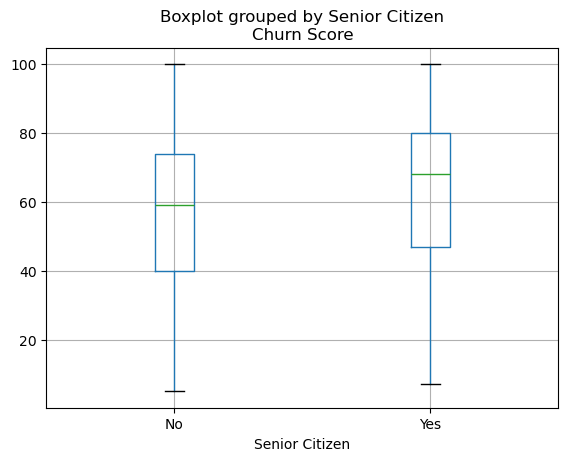

In [28]:
data.boxplot(by='Senior Citizen', column=['Churn Score'])

<Axes: title={'center': 'Churn Score'}, xlabel='Partner'>

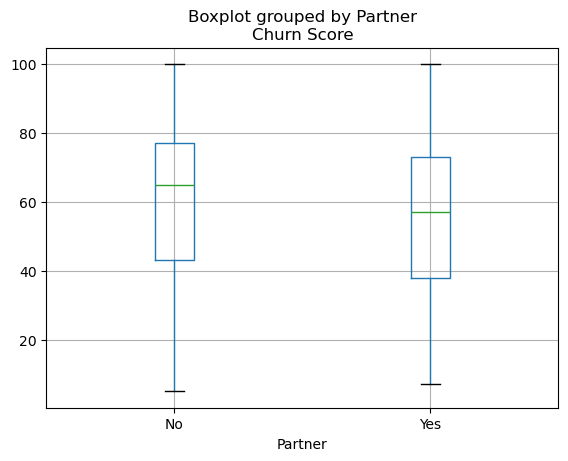

In [29]:
data.boxplot(by='Partner', column=['Churn Score'])

<Axes: title={'center': 'Churn Score'}, xlabel='Gender'>

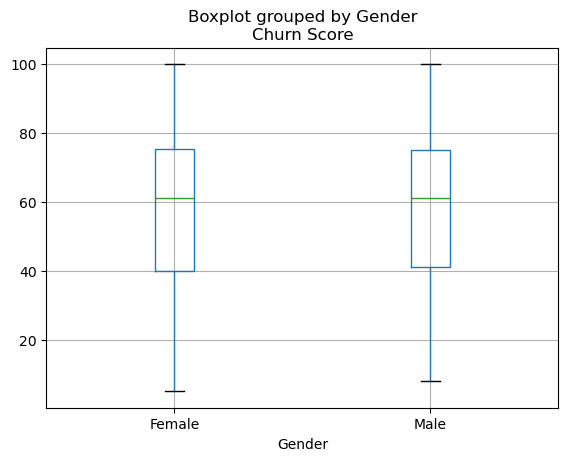

In [30]:
data.boxplot(by='Gender', column=['Churn Score'])

<Axes: xlabel='Senior Citizen'>

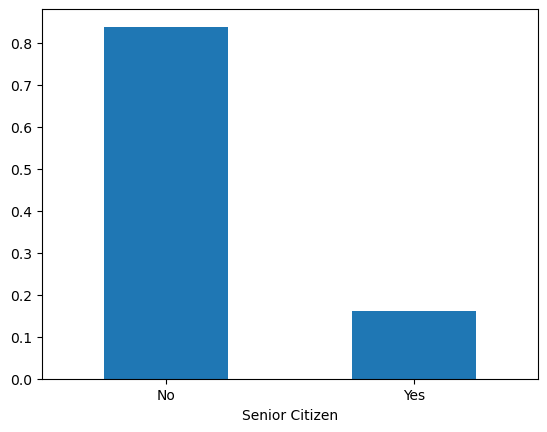

In [31]:
(data.groupby('Senior Citizen').count() / data.count())['Churn Value'].plot(kind='bar',rot=0)

In [32]:
data[['Senior Citizen', 'Churn Value']].groupby('Senior Citizen')['Churn Value'].mean()

Senior Citizen
No     0.236062
Yes    0.416813
Name: Churn Value, dtype: float64

In [33]:
data.groupby('Senior Citizen')['Churn Value'].mean()

Senior Citizen
No     0.236062
Yes    0.416813
Name: Churn Value, dtype: float64

In [34]:
data.groupby('Senior Citizen')['Churn Score'].mean()

Senior Citizen
No     57.731910
Yes    63.698774
Name: Churn Score, dtype: float64

In [35]:
data.groupby('Gender')['Churn Value'].mean()

Gender
Female    0.269209
Male      0.261603
Name: Churn Value, dtype: float64

In [36]:
data.groupby('Gender')['Churn Score'].mean()

Gender
Female    58.692661
Male      58.706048
Name: Churn Score, dtype: float64

In [37]:
data.groupby('Partner')['Churn Value'].mean()

Partner
No     0.329580
Yes    0.196649
Name: Churn Value, dtype: float64

In [38]:
data.groupby('Partner')['Churn Score'].mean()

Partner
No     61.009063
Yes    56.227513
Name: Churn Score, dtype: float64

In [39]:
data.groupby('Dependents')['Churn Value'].mean()

Dependents
No     0.325517
Yes    0.065151
Name: Churn Value, dtype: float64

In [40]:
data.groupby('Dependents')['Churn Score'].mean()

Dependents
No     60.763294
Yes    51.829133
Name: Churn Score, dtype: float64

In [41]:
data_senior = data.loc[data['Senior Citizen'] == 'Yes']

In [42]:
data_senior

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
16,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,Female,...,Month-to-month,Yes,Credit card (automatic),80.65,633.3,Yes,1,69,5302,Competitor made better offer
17,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,Male,...,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes,1,81,3179,Competitor made better offer
23,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,Female,...,Month-to-month,Yes,Electronic check,98.50,2514.5,Yes,1,88,5337,Limited range of services
26,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188,Female,...,Month-to-month,Yes,Electronic check,76.50,2868.15,Yes,1,67,2793,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,2274-XUATA,1,United States,California,Earp,92242,"34.137742, -114.36514",34.137742,-114.365140,Male,...,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No,0,56,4933,NaN
7021,0666-UXTJO,1,United States,California,Morongo Valley,92256,"34.097863, -116.594561",34.097863,-116.594561,Male,...,Month-to-month,Yes,Credit card (automatic),85.20,2874.45,No,0,27,5393,NaN
7027,1035-IPQPU,1,United States,California,Parker Dam,92267,"34.273872, -114.192901",34.273872,-114.192901,Female,...,Month-to-month,Yes,Electronic check,103.50,6479.4,No,0,53,5187,NaN
7032,2235-DWLJU,1,United States,California,Thousand Palms,92276,"33.849263, -116.382778",33.849263,-116.382778,Female,...,Month-to-month,Yes,Electronic check,44.40,263.05,No,0,71,4611,NaN


In [43]:
data_senior['Churn Value'].value_counts()

Churn Value
0    666
1    476
Name: count, dtype: int64

In [44]:
unique_values

{'CustomerID': ('Number of Unique Values: 7043', dtype('O')),
 'Count': array([1], dtype=int64),
 'Country': array(['United States'], dtype=object),
 'State': array(['California'], dtype=object),
 'City': ('Number of Unique Values: 1129', dtype('O')),
 'Zip Code': ('Number of Unique Values: 1652', dtype('int64')),
 'Lat Long': ('Number of Unique Values: 1652', dtype('O')),
 'Latitude': ('Number of Unique Values: 1652', dtype('float64')),
 'Longitude': ('Number of Unique Values: 1651', dtype('float64')),
 'Gender': array(['Male', 'Female'], dtype=object),
 'Senior Citizen': array(['No', 'Yes'], dtype=object),
 'Partner': array(['No', 'Yes'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'Tenure Months': ('Number of Unique Values: 73', dtype('int64')),
 'Phone Service': array(['Yes', 'No'], dtype=object),
 'Multiple Lines': array(['No', 'Yes', 'No phone service'], dtype=object),
 'Internet Service': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'Online Security

In [45]:
unique_values.__str__()

"{'CustomerID': ('Number of Unique Values: 7043', dtype('O')), 'Count': array([1], dtype=int64), 'Country': array(['United States'], dtype=object), 'State': array(['California'], dtype=object), 'City': ('Number of Unique Values: 1129', dtype('O')), 'Zip Code': ('Number of Unique Values: 1652', dtype('int64')), 'Lat Long': ('Number of Unique Values: 1652', dtype('O')), 'Latitude': ('Number of Unique Values: 1652', dtype('float64')), 'Longitude': ('Number of Unique Values: 1651', dtype('float64')), 'Gender': array(['Male', 'Female'], dtype=object), 'Senior Citizen': array(['No', 'Yes'], dtype=object), 'Partner': array(['No', 'Yes'], dtype=object), 'Dependents': array(['No', 'Yes'], dtype=object), 'Tenure Months': ('Number of Unique Values: 73', dtype('int64')), 'Phone Service': array(['Yes', 'No'], dtype=object), 'Multiple Lines': array(['No', 'Yes', 'No phone service'], dtype=object), 'Internet Service': array(['DSL', 'Fiber optic', 'No'], dtype=object), 'Online Security': array(['Yes',

In [46]:
writer = csv.writer(sys.stdout)

# Write the header (keys of the dictionary)
writer.writerow(unique_values.keys())

# Write the data (values of the dictionary)
writer.writerow(unique_values.values())

CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
"('Number of Unique Values: 7043', dtype('O'))",[1],['United States'],['California'],"('Number of Unique Values: 1129', dtype('O'))","('Number of Unique Values: 1652', dtype('int64'))","('Number of Unique Values: 1652', dtype('O'))","('Number of Unique Values: 1652', dtype('float64'))","('Number of Unique Values: 1651', dtype('float64'))",['Male' 'Female'],['No' 'Yes'],['No' 'Yes'],['No' 'Yes'],"('Number of Unique Values: 73', dtype('int64'))",['Yes' 'No'],['No' 'Yes' 'No phone service'],['DSL' 'Fiber optic' 'No'],['Yes' 'No' 'No internet service'],['Yes' 'No' 'No internet service'],['No' 'Yes' 'No int

1147

In [47]:
unique_values_list = list(unique_values2.items())

unique_columns = pd.DataFrame(unique_values_list, columns=['Column Name', 'Unique Values'])

NameError: name 'unique_values2' is not defined

In [ ]:
unique_columns

In [ ]:
unique_columns.to_csv('data/Unique Columns.csv')

In [49]:
def returnUnique2(data, column):
    if len(data[column].unique()) < 10: return (f'Unique Values: {data[column].unique()}', data[column].dtype)
    return (f'Number of Unique Values: {len(data[column].unique())}', data[column].dtype)

In [50]:
unique_values2 = {column: returnUnique2(data, column) for column in data.columns}

In [51]:
writer = csv.writer(sys.stdout)

# Write the header (keys of the dictionary)
writer.writerow(unique_columns.keys())

# Write the data (values of the dictionary)
writer.writerow(unique_columns.values())

NameError: name 'unique_columns' is not defined

In [52]:
len(data.columns)

33